In [1]:
import nltk
import pandas as pd
import numpy as np
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk import WordNetLemmatizer
nltk.download('wordnet')
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

lemma = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv('train_test.csv')
df = df.rename(columns={'type': 'tttype', 'text': 'tttext'})
df.head()

,tttype,tttext
0,ham,"Fighting with the world is easy, u either win ..."
1,ham,When can Ì_ come out?
2,ham,Check with nuerologist.
3,ham,Lolnice. I went from a fish to ..water.?
4,spam,+123 Congratulations - in this week's competit...


In [3]:
df['tttext'] = df['tttext'].str.lower()
df['tttext'] = df['tttext'].apply(lambda x: ' '.join([word for word in x.split() if (word.isalpha() or word=='?')]))
df['tttext'] = df.tttext.apply(lemma.lemmatize)
df['tttext'] = df.tttext.apply(word_tokenize)
df.head()

,tttype,tttext
0,ham,"[fighting, with, the, world, is, u, either, wi..."
1,ham,"[when, can, come]"
2,ham,"[check, with]"
3,ham,"[i, went, from, a, fish, to]"
4,spam,"[congratulations, in, this, competition, draw,..."


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1)


In [5]:
vocab = list(set(train.tttext.sum()))


In [6]:
freq = []
for i in list(train['tttext']):
    freq.append([i.count(j) for j in vocab])


In [7]:
train2 = pd.concat([train.reset_index(), pd.DataFrame(freq, columns=vocab)], axis=1)

train2.head()

,index,tttype,tttext,camry,stranger,interview,kill,thats,low,london,heading,girlfrnd,depressed,ben,bluff,private,yoyyooo,search,imma,college,boooo,blanked,xavier,corrct,youre,computer,require,liverpool,guides,pleasant,level,lit,park,bx,laughed,lect,juan,aah,txts,answerin,...,hvae,nag,further,sleeping,india,coccooning,prone,appreciate,fit,promised,studio,jide,jsco,always,florida,tm,community,undrstnd,manageable,dealer,tt,ibiza,hottest,gals,alex,hair,ans,sf,zed,excellent,lololo,shove,dwn,åð,bak,analysis,blankets,theres,stifled,uncut
0,3509,spam,"[win, a, with, westlife, u, or, a, they, are, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3147,ham,"[as, per, your, request, has, been, set, as, y...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4148,ham,"[please, protect, yourself, from, sib, never, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,367,spam,"[your, account, statement, for, xxxxxx, shows,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4418,ham,"[re, your, you, see, my, facebook]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
p_ham = list(train2['tttype']).count('ham')/len(list(train2['tttype']))
p_spam = list(train2['tttype']).count('spam')/len(list(train2['tttype']))
print(p_ham)
print(p_spam)

0.8702892199824716
0.12971078001752848


16.636824324324323
11.367321248741188


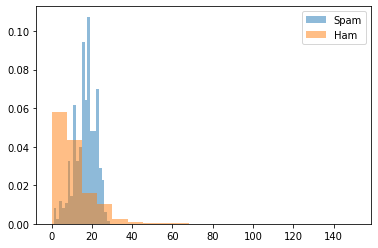

In [9]:
import matplotlib.pyplot as plt

spam_length = []
ham_length = []
for i in list(train2.loc[train2['tttype'] == 'spam']['tttext']):
    spam_length.append(len(i))
for i in list(train2.loc[train2['tttype'] == 'ham']['tttext']):
    ham_length.append(len(i))

print(sum(spam_length)/len(spam_length))
print(sum(ham_length)/len(ham_length))

plt.hist(spam_length, density=True, alpha=0.5, bins=20, label='Spam') 
plt.hist(ham_length, density=True, alpha=0.5, bins=20, label='Ham') 
plt.legend(loc='upper right')

plt.show()

In [10]:
spam_values, spam_edges = np.histogram(spam_length, bins=20)
ham_values, ham_edges = np.histogram(ham_length, bins=20)
spam_values = [i/sum(spam_values) for i in spam_values]
ham_values = [i/sum(ham_values) for i in ham_values]

print(ham_values)
print(ham_edges)
print(spam_values)
print(spam_edges)

[0.43680765357502516, 0.3288016112789527, 0.1216012084592145, 0.07754279959718026, 0.01812688821752266, 0.008811681772406849, 0.0027693856998992953, 0.0017623363544813696, 0.0015105740181268882, 0.00025176233635448137, 0.0005035246727089627, 0.0007552870090634441, 0.00025176233635448137, 0.0, 0.0, 0.0, 0.00025176233635448137, 0.0, 0.0, 0.00025176233635448137]
[  0.     7.55  15.1   22.65  30.2   37.75  45.3   52.85  60.4   67.95
  75.5   83.05  90.6   98.15 105.7  113.25 120.8  128.35 135.9  143.45
 151.  ]
[0.011824324324324325, 0.0033783783783783786, 0.016891891891891893, 0.011824324324324325, 0.015202702702702704, 0.04560810810810811, 0.02027027027027027, 0.08614864864864864, 0.04560810810810811, 0.05574324324324324, 0.13175675675675674, 0.08952702702702703, 0.15033783783783783, 0.06756756756756757, 0.06756756756756757, 0.09797297297297297, 0.04054054054054054, 0.03209459459459459, 0.008445945945945946, 0.0016891891891891893]
[ 1.   2.4  3.8  5.2  6.6  8.   9.4 10.8 12.2 13.6 15.  1

In [11]:
number_of_spam_words = 0
for i in list(train2.loc[train2['tttype'] == 'spam']['tttext']):
    number_of_spam_words+=len(i)
print(number_of_spam_words)
number_of_ham_words = 0
for i in list(train2.loc[train2['tttype'] == 'ham']['tttext']):
    number_of_ham_words+=len(i)
print(number_of_ham_words)

9849
45151


In [12]:
def get_p_spam(word):
    if word in vocab:
        return (sum(list(train2.loc[train2['tttype'] == 'spam'][word])) + 1) / (number_of_spam_words + len(vocab))
    return 1

def get_p_ham(word):
    if word in vocab:
        return (sum(list(train2.loc[train2['tttype'] == 'ham'][word])) + 1) / (number_of_ham_words + len(vocab))
    return 1

In [13]:
get_p_spam('have')

0.007243096423721141

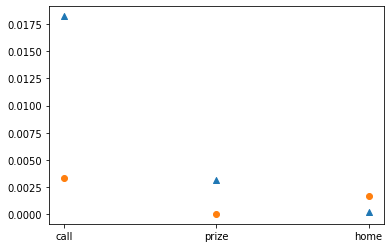

In [23]:
x1 = get_p_spam('call')
x2 = get_p_spam('prize')
x3 = get_p_spam('home')
y1 = get_p_ham('call')
y2 = get_p_ham('prize')
y3 = get_p_ham('home')


plt.scatter(['call', 'prize', 'home'], [x1, x2, x3], marker='^')
plt.scatter(['call', 'prize', 'home'], [y1, y2, y3], marker='o')
plt.show()

In [24]:
def accuracy(Y_pred, Y):
    return sum(1 for x, y in zip(Y_pred, Y) if x==y) / len(Y)

def matrix_confusion(Y_pred, Y):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(Y)):
        if(Y_pred[i]==Y[i] and Y[i]=='spam'):
            TP+=1
        elif(Y_pred[i]==Y[i] and Y[i]=='ham'):
            TN+=1
        elif(Y_pred[i]!=Y[i] and Y[i]=='spam'):
            FN+=1
        elif(Y_pred[i]!=Y[i] and Y[i]=='ham'):
            FP+=1
    return TP, TN, FP, FN

def report_classification(Y_pred, Y):
    TP, TN, FP, FN = matrix_confusion(Y_pred, Y)
    Accuracy = (TP+TN)/(TP+FP+FN+TN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    Specificity = TN/(TN+FP)
    f1 = (2*Precision*Recall)/(Precision+Recall)
    return Accuracy, Precision, Recall, Specificity, f1

In [25]:
text = list(test['tttext'])
label = list(test['tttype'])
pred = []
for i in text:
    spam = p_spam
    ham = p_ham
    for j in i:
        spam *= get_p_spam(j)
        ham *= get_p_ham(j)
    for k in range(len(spam_edges)-1):
        if (spam_edges[k]<=len(i) and len(i)<=spam_edges[k+1]):
            spam *= spam_values[k]
            break
    for k in range(len(ham_edges)-1):
        if (ham_edges[k]<=len(i) and len(i)<=ham_edges[k+1]):
            ham *= ham_values[k]
            break
    
    if spam>ham:
        pred.append('spam')
    else:
        pred.append('ham')


In [26]:
res = report_classification(pred, label)
print('Accuracy: ', res[0])
print('Precision: ', res[1])
print('Recall: ', res[2])

Accuracy:  0.9744094488188977
Precision:  0.9863013698630136
Recall:  0.8571428571428571


In [27]:
ef = pd.read_csv('evaluate.csv')
ef.head()

,id,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,2,Ok lar... Joking wif u oni...
2,3,Free entry in 2 a wkly comp to win FA Cup fina...
3,4,U dun say so early hor... U c already then say...
4,5,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
ef['text'] = ef['text'].str.lower()
ef['text'] = ef['text'].apply(lambda x: ' '.join([word for word in x.split() if (word.isalpha() or word=='?')]))
ef['text'] = ef.text.apply(lemma.lemmatize)
ef['text'] = ef.text.apply(word_tokenize)
ef.head()

,id,text
0,1,"[go, until, jurong, available, only, in, bugis..."
1,2,"[ok, joking, wif, u]"
2,3,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,4,"[u, dun, say, so, early, u, c, already, then]"
4,5,"[nah, i, think, he, goes, to, he, lives, aroun..."


In [29]:
eval_text = list(ef['text'])
eval_id = list(ef['id'])
pred_eval = []
for i in eval_text:
    spam = p_spam
    ham = p_ham
    for j in i:
        spam *= get_p_spam(j)
        ham *= get_p_ham(j)
    for k in range(len(spam_edges)-1):
        if (spam_edges[k]<=len(i) and len(i)<=spam_edges[k+1]):
            spam *= spam_values[k]
            break
    for k in range(len(ham_edges)-1):
        if (ham_edges[k]<=len(i) and len(i)<=ham_edges[k+1]):
            ham *= ham_values[k]
            break
    
    if spam>ham:
        pred_eval.append('spam')
    else:
        pred_eval.append('ham')

In [30]:
eval_id = np.array(eval_id)
pred_eval = np.array(pred_eval)
eval_res = []
for i, j in zip(eval_id, pred_eval):
    eval_res.append([i, j])
print(eval_res)

[[1, 'ham'], [2, 'ham'], [3, 'spam'], [4, 'ham'], [5, 'ham'], [6, 'ham'], [7, 'ham'], [8, 'ham'], [9, 'spam'], [10, 'spam'], [11, 'ham'], [12, 'spam'], [13, 'spam'], [14, 'ham'], [15, 'ham'], [16, 'spam'], [17, 'ham'], [18, 'ham'], [19, 'ham'], [20, 'spam'], [21, 'ham'], [22, 'ham'], [23, 'ham'], [24, 'ham'], [25, 'ham'], [26, 'ham'], [27, 'ham'], [28, 'ham'], [29, 'ham'], [30, 'ham'], [31, 'ham'], [32, 'ham'], [33, 'ham'], [34, 'ham'], [35, 'spam'], [36, 'ham'], [37, 'ham'], [38, 'ham'], [39, 'ham'], [40, 'ham'], [41, 'ham'], [42, 'ham'], [43, 'spam'], [44, 'ham'], [45, 'ham'], [46, 'ham'], [47, 'ham'], [48, 'ham'], [49, 'ham'], [50, 'ham'], [51, 'ham'], [52, 'ham'], [53, 'ham'], [54, 'ham'], [55, 'spam'], [56, 'ham'], [57, 'ham'], [58, 'ham'], [59, 'ham'], [60, 'ham'], [61, 'ham'], [62, 'ham'], [63, 'ham'], [64, 'ham'], [65, 'ham'], [66, 'spam'], [67, 'ham'], [68, 'spam'], [69, 'ham'], [70, 'ham'], [71, 'ham'], [72, 'ham'], [73, 'ham'], [74, 'ham'], [75, 'ham'], [76, 'ham'], [77, 'ha

In [31]:
import csv

with open('out.csv', 'w', newline='') as myfile:
    csvWriter = csv.writer(myfile, delimiter=',')
    csvWriter.writerows(eval_res)